# Import Libraries


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #hide warnings

sns.set_style("white")
plt.style.use("seaborn-dark-palette")

# Loading the Data


In [2]:
data = pd.read_csv("data_agg.csv")
data

,YearWeekISO,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,AZ,8901064
1,2020-W53,AT,8901064.0,61425.0,0.0,5279,NaN,0,0,0,AT,ALL,COM,8901064
2,2020-W53,AT,8901064.0,0.0,0.0,1,NaN,0,0,0,AT,ALL,UNK,8901064
3,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,JANSS,8901064
4,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,MOD,8901064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209952,2022-W02,SK,391090.0,0.0,0.0,17,NaN,0,76,0,SK,Age70_79,JANSS,5457873
209953,2022-W02,SK,184680.0,0.0,0.0,74,NaN,429,718,0,SK,Age80+,COM,5457873
209954,2022-W02,SK,184680.0,0.0,0.0,6,NaN,0,21,0,SK,Age80+,JANSS,5457873
209955,2022-W02,SK,184680.0,0.0,0.0,14,NaN,40,188,0,SK,Age80+,MOD,5457873


### Data Dictionary

+ **YearWeekISO:** Date when the vaccine was received/administered. Only weeks are allowed.


+ **ReportingCountry:** ISO 3166-1-alpha-2.


+ **Denominator:** Population denominators for target groups (total population and agespecific population obtained from                            Eurostat/UN). Denominators reported by countries for TargetGroup = “HCW” and TargetGroup = “LTCF”.


+ **NumberDosesReceived:** Number of vaccine doses distributed by the manufacturers to the country during the reporting week.
 
 
+ **NumberDosesExported:** Number of vaccine doses donated or sold by the country during the reporting week.


+ **FirstDose:** Number of first dose vaccine administered to individuals during the reporting week.


+ **FirstDoseRefused:** Number of individuals refusing the first vaccine dose.


+ **SecondDose:** Number of second dose vaccine administered to individuals during the reporting week.


+ **DoseAdditional1:** Number of additional doses administered to individuals during the reporting week. 


+ **UnknownDose:** Number of doses administered during the reporting week where the type of dose was not specified.


+ **Region:** As a minimum data should be reported at national level (Region = country code).


+ **TargetGroup:** Target group for vaccination. As a minimum the following should be reported: “ALL” for the overall figures,                   “HCW” for healthcare workers and age-groups (preferably using the detailed age-groups).


+ **Vaccine:** Name of vaccine. Additional vaccines will be added on approval or as requested.


+ **Population:** Age-specific population for the country.

# Exploratory Data Analysis (EDA)

The fist part of this analysis is performed through a basic understanding of the data; for instance, it is important to know the type of variables present in the dataset and the percentage of null values.

In [3]:
#check the type of the variables
data.dtypes

YearWeekISO             object
ReportingCountry        object
Denominator            float64
NumberDosesReceived    float64
NumberDosesExported    float64
FirstDose                int64
FirstDoseRefused       float64
SecondDose               int64
DoseAdditional1          int64
UnknownDose              int64
Region                  object
TargetGroup             object
Vaccine                 object
Population               int64
dtype: object

In [4]:
#percentage of null values
nrow = data.shape[0]
data.isna().sum()/nrow

YearWeekISO            0.000000
ReportingCountry       0.000000
Denominator            0.424225
NumberDosesReceived    0.851279
NumberDosesExported    0.897803
FirstDose              0.000000
FirstDoseRefused       0.993175
SecondDose             0.000000
DoseAdditional1        0.000000
UnknownDose            0.000000
Region                 0.000000
TargetGroup            0.000000
Vaccine                0.000000
Population             0.000000
dtype: float64

In some columns the percentage of NaN values is considerably large. The variables "FirstDoseRefused", "NumberDosesExported" and "NumberDosesReceived" contains a percentage of NaN values above 80%: for this reason, we decided to drop these columns as they do not provide significant information.

In [5]:
data.drop(["NumberDosesReceived","NumberDosesExported","FirstDoseRefused"], axis = 1, inplace = True)

Since our research question is completely focused on the italian sentiment, we consider only data taken from Italy. 
To obtain the data in the first two rows we filter for the rows that have a value equal to 'IT' in the column 'ReportingCountry' and create a new dataset named 'italy' with the .loc function to access the elements from the original dataset that respect the condition mentioned above.
In the second part of the chunk we check again the percentage of the null values for the sliced data.


In [6]:
filt = data["ReportingCountry"]=="IT"
italy = data.loc[filt]
nrow = italy.shape[0]
italy.isna().sum()/nrow

YearWeekISO         0.000000
ReportingCountry    0.000000
Denominator         0.065264
FirstDose           0.000000
SecondDose          0.000000
DoseAdditional1     0.000000
UnknownDose         0.000000
Region              0.000000
TargetGroup         0.000000
Vaccine             0.000000
Population          0.000000
dtype: float64

In this part we investigate for the null values in the "Denominator" column to check how we can reduce the percentage of NaN values.

In [7]:
italy[italy.Denominator.isna()][["Denominator","TargetGroup"]]

,Denominator,TargetGroup
131006,NaN,HCW
131007,NaN,LTCF
131036,NaN,HCW
131037,NaN,LTCF
131087,NaN,HCW
...,...,...
136581,NaN,HCW
136582,NaN,HCW
136583,NaN,LTCF
136584,NaN,LTCF


We see that the null values in the "Denominator" variable are related to two specific categories of the "TargetGroup" variable: HCW and LTCF. HCW stands for Health Care Workers and LTCF stands for Residents in long term care facilities, so the "Denominator" variable in this case should show the population number for this  two categories, but probably it was difficult to find reliable values.  Our decision is to remove the rows associated with this two categories and, in this way, we should get zero null values.

In [8]:
filt = (italy.TargetGroup != "HCW") & (italy.TargetGroup != "LTCF")
italy = italy[filt]
nrow = italy.shape[0]
italy.isna().sum()/nrow

YearWeekISO         0.0
ReportingCountry    0.0
Denominator         0.0
FirstDose           0.0
SecondDose          0.0
DoseAdditional1     0.0
UnknownDose         0.0
Region              0.0
TargetGroup         0.0
Vaccine             0.0
Population          0.0
dtype: float64

The column named "Region" contains values representing the code of the italian regions. It could be useful and much clearer to write the real name of the region. 

In [9]:
italy.Region.unique()

array(['ITI1', 'ITF2', 'ITF1', 'ITC1', 'ITC2', 'IT', 'ITC4', 'ITH1',
       'ITF5', 'ITF4', 'ITG1', 'ITF6', 'ITI4', 'ITI3', 'ITF3', 'ITI2',
       'ITH2', 'ITH3', 'ITH4', 'ITC3', 'ITH5', 'ITG2'], dtype=object)

In this chunk we convert the codes into the real name of the regions through a dictionary. 
Note that the region 'Trentino-Alto Adige' is associated with two different codes because it accounts for both the 
Autonomous Province of Bolzano and the Province of Trento.

In [10]:
names = {"ITF1":"Abruzzo",
         "ITF2":"Molise",
         "ITF3":"Campania",
         "ITF4":"Puglia",
         "ITF5":"Basilicata",
         "ITH5":"Emilia-Romagna",
         "ITH1":"Trentino-Alto Adige",
         "IT":"Nazionale",
         "ITI2":"Umbria",
         "ITG1":"Sicilia",
         "ITH2":"Trentino-Alto Adige",
         "ITH3":"Veneto",
         "ITH4":"Friuli-Venezia Giulia",
         "ITC3":"Liguria",
         "ITF6":"Calabria",
         "ITC1":"Piemonte",
         "ITC2":"Valle d'Aosta",
         "ITC4":"Lombardia",
         "ITI1":"Toscana",
         "ITI3":"Marche",
         "ITI4":"Lazio",
         "ITG2":"Sardegna"}

italy["Region"] = italy["Region"].apply( lambda x : names[x])

Since we have filtered the data for the italian country we can drop the column "ReportingCountry".

In [11]:
italy.drop("ReportingCountry", axis=1, inplace=True)

## Data exploration

### Questions to Answer

+ How many people received the first dose? 
+ First dose over weeks.
+ How many people received the second dose?
+ Second dose over weeks.
+ Which is the most used vaccine?
+ Type of vaccine among target groups.
+ Percentage of vaccinated population.
+ Percentage of vaccinated among target groups.

In [12]:
italy.head(30)

,YearWeekISO,Denominator,FirstDose,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population
130978,2020-W52,3692555.0,620,0,0,0,Toscana,ALL,COM,59641488
130979,2020-W52,300516.0,50,0,0,0,Molise,ALL,COM,59641488
130980,2020-W52,1293941.0,38,0,0,0,Abruzzo,ALL,COM,59641488
130981,2020-W52,4311217.0,911,2,0,0,Piemonte,ALL,COM,59641488
130982,2020-W52,125034.0,20,0,0,0,Valle d'Aosta,ALL,COM,59641488
130983,2020-W52,59641488.0,7221,2,0,0,Nazionale,ALL,COM,59641488
130984,2020-W52,10027602.0,718,0,0,0,Lombardia,ALL,COM,59641488
130985,2020-W52,532644.0,144,0,0,0,Trentino-Alto Adige,ALL,COM,59641488
130986,2020-W52,553254.0,106,0,0,0,Basilicata,ALL,COM,59641488
130987,2020-W52,3953305.0,510,0,0,0,Puglia,ALL,COM,59641488


There are multiple ways to get the answer at the first question, we have decided to sum all the first shots for every age group. The first thing we do is to filter the "Region" variable so that it takes only the value "Nazionale"; furthermore, since we want the various age groups, we want the values in the "TargetGroup" column to be different from "ALL". 
After that, we apply the filter with the function .loc and finally we group by the week and sum all the values in the "FirstDose" column.

In [13]:
#How many people received the first dose?
filt = (italy.Region == "Nazionale") & (italy.TargetGroup != "ALL")
first = italy.loc[filt]
new_first = first.groupby("YearWeekISO",as_index=False).sum()
new_first["FirstDose"].sum()
# 47.989.430 million people got the first shot

47989430

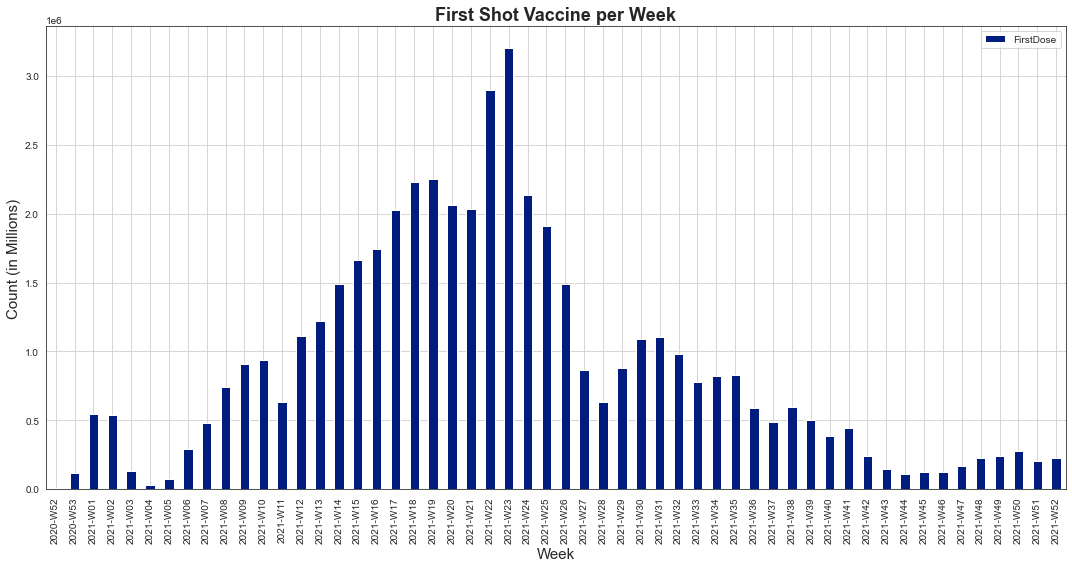

In [14]:
#First vaccine shot over weeks
new_first[["YearWeekISO","FirstDose"]].plot(kind="bar",figsize=(15,8))

plt.xlabel("Week",fontsize=15)
plt.ylabel("Count (in Millions)",fontsize=15)
plt.title("First Shot Vaccine per Week",fontdict={"fontweight":"bold","fontsize":18})

plt.grid()
plt.xticks((np.arange(54)), (new_first.YearWeekISO))
plt.tight_layout()
plt.show()

In the above graph we are able to see the number of first dose per week. The weeks with a higher number of first dose
are the ones from W17 and W26 corresponding to the months of may june and july in wich the vaccination was opened to all 
the people above 12 years old. 

In [15]:
#How many people received the second dose?
filt = (italy.Region == "Nazionale") & (italy.TargetGroup != "ALL") 
second = italy.loc[filt]
new_second = second.groupby("YearWeekISO",as_index=False).sum()
new_second["SecondDose"].sum() # 42.834.996 million people got the second shot

42834996

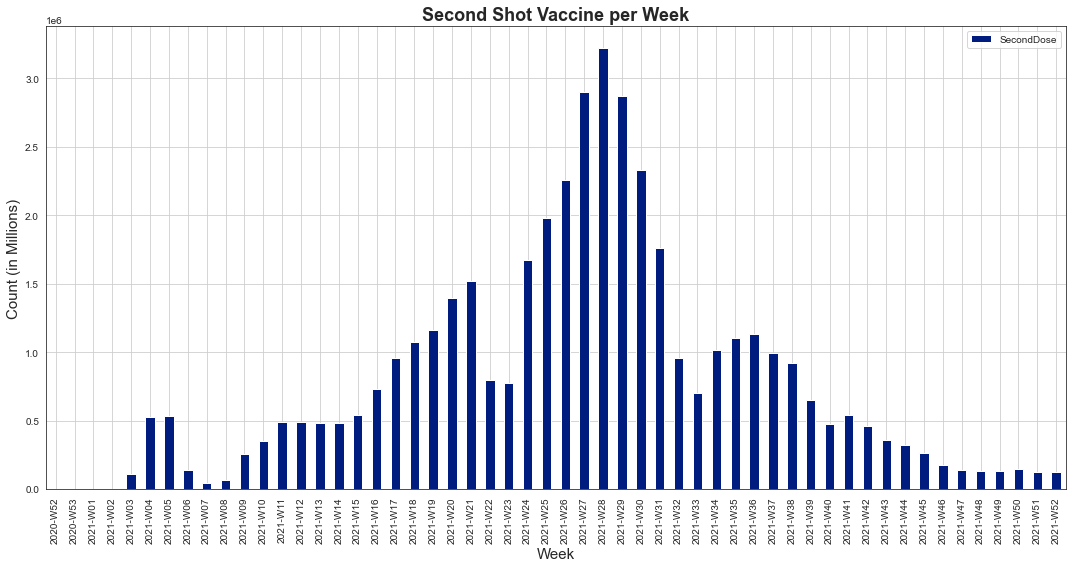

In [16]:
#Second vaccine shot over weeks
new_second[["YearWeekISO","SecondDose"]].plot(kind="bar",figsize=(15,8))

plt.xlabel("Week",fontsize=15)
plt.ylabel("Count (in Millions)",fontsize=15)
plt.title("Second Shot Vaccine per Week",fontdict={"fontweight":"bold","fontsize":18})

plt.grid()
plt.xticks((np.arange(54)), (new_first.YearWeekISO))
plt.tight_layout()
plt.show()

The weeks with a higher number of second doses are the ones from W24 and W31. The explanation can be the same as the first doses: the opening of the vaccinal campaign for almost the entire population. The effect is delayed of ~7 weeks compared to the first dose.

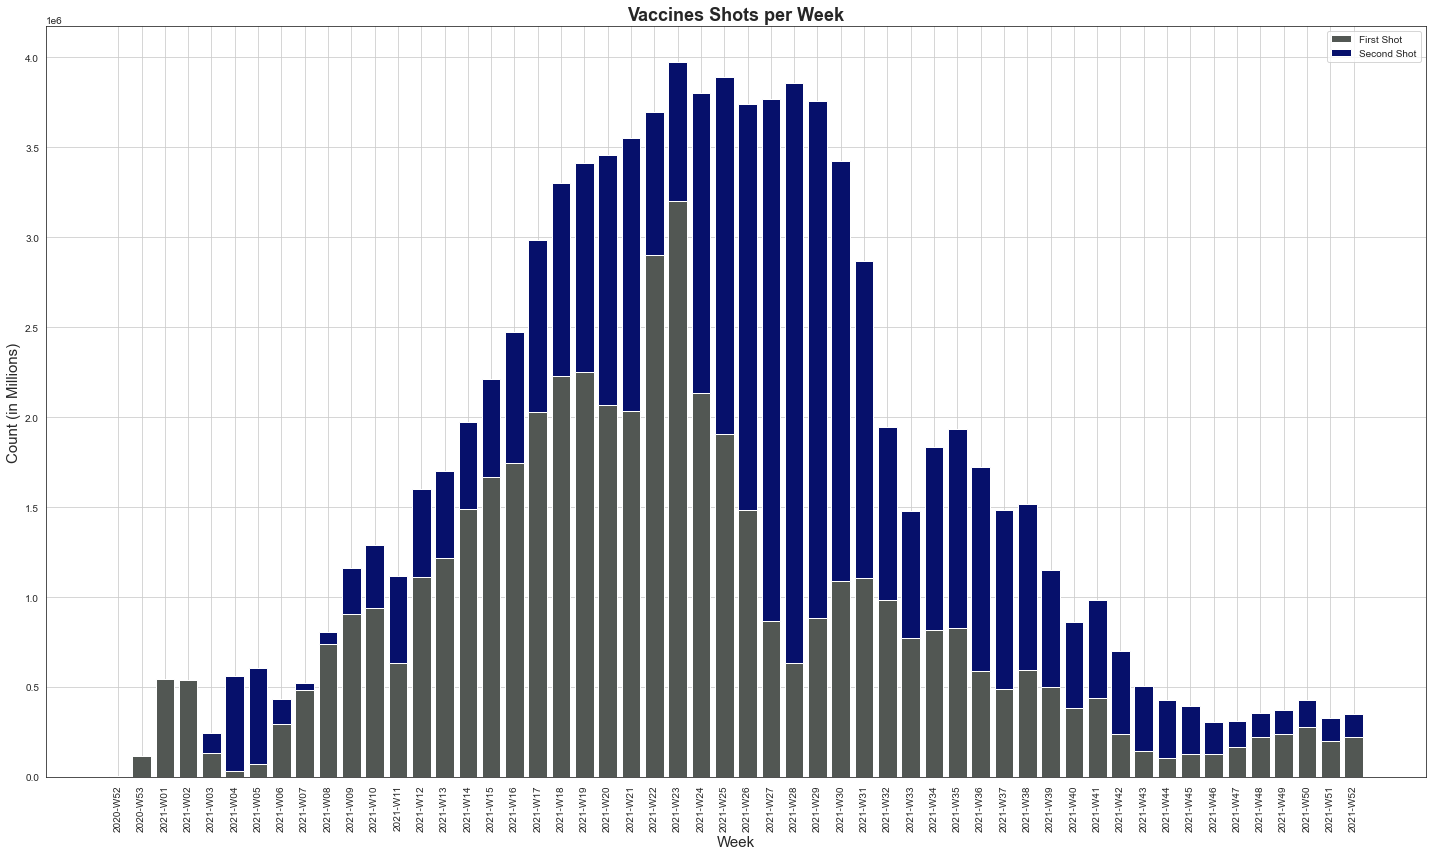

In [17]:
filt = (italy.Region == "Nazionale") & (italy.TargetGroup != "ALL") 
first = italy.loc[filt]
new_first = first.groupby("YearWeekISO",as_index=False).sum()
a = new_first["FirstDose"]

filt = (italy.Region == "Nazionale") & (italy.TargetGroup != "ALL")
second = italy.loc[filt]
new_second = second.groupby("YearWeekISO",as_index=False).sum()
b = new_second["SecondDose"]

x = np.arange(54)

plt.figure(figsize=(20, 12))
plt.bar(x, a, color = '#525753', label="First Shot")
plt.bar(x, b, bottom = a, color = '#06106b', label="Second Shot")

plt.xlabel("Week",fontsize=15)
plt.ylabel("Count (in Millions)",fontsize=15)
plt.title("Vaccines Shots per Week",fontdict={"fontweight":"bold","fontsize":18})

plt.xticks((np.arange(54)), (new_first.YearWeekISO), rotation=90)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

We are going to create a new variable called "Total" which is the sum of FirstDose, SecondDose,DoseAdditional and UnknownDose.

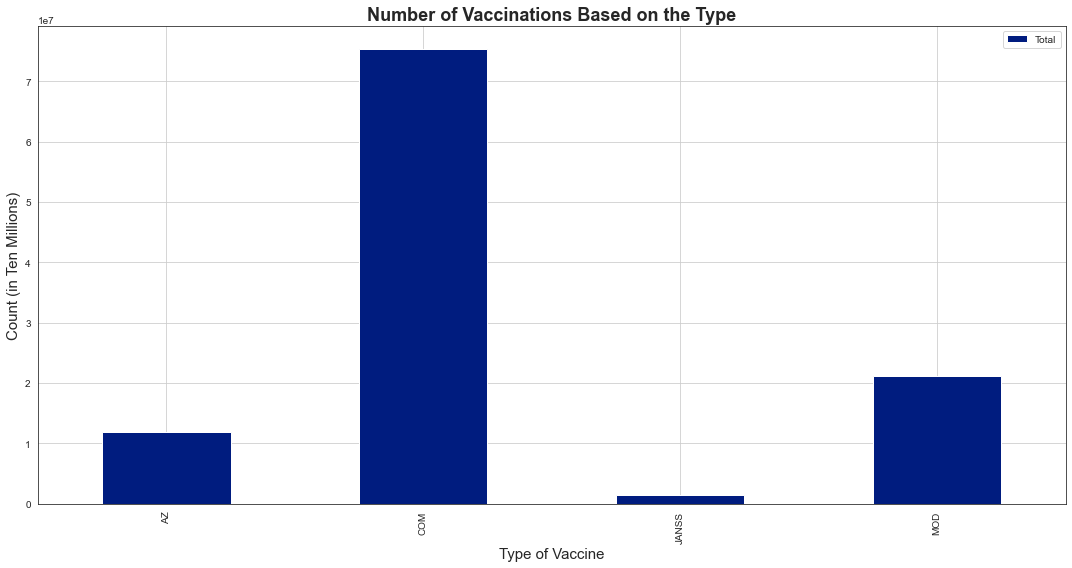

,Vaccine,Total
0,AZ,11975552
1,COM,75357550
2,JANSS,1478487
3,MOD,21190469


In [18]:
#Which is the most used vaccine?
italy["Total"] = italy["FirstDose"]+italy["SecondDose"]+italy["DoseAdditional1"]+italy["UnknownDose"]

filt = (italy.Region == "Nazionale") & (italy.TargetGroup != "ALL")  
vaccine = italy.loc[filt].groupby("Vaccine",as_index=False).sum()

vaccine[["Vaccine","Total"]].plot(kind="bar",figsize=(15,8))

plt.xlabel("Type of Vaccine",fontsize=15)
plt.ylabel("Count (in Ten Millions)",fontsize=15)
plt.title("Number of Vaccinations Based on the Type",fontdict={"fontweight":"bold","fontsize":18})

plt.grid()
plt.xticks((0, 1, 2, 3), (vaccine.Vaccine))
plt.tight_layout()
plt.show()

vaccine[["Vaccine","Total"]]

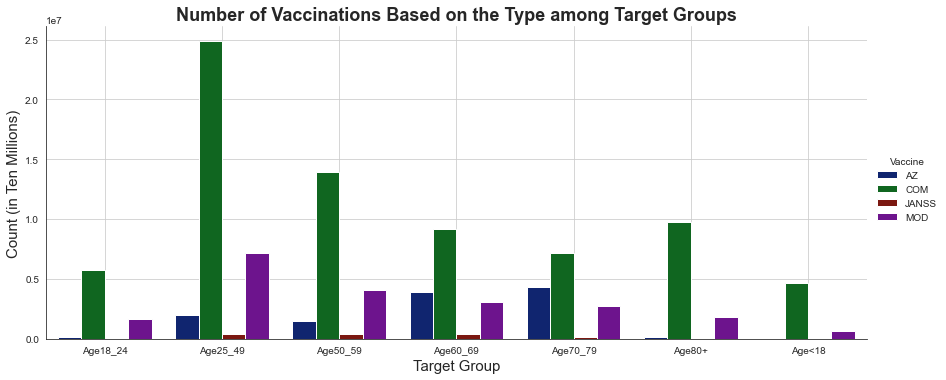

In [19]:
#Type of vaccine among target groups
filt = (italy["Region"] == "Nazionale") & (italy["TargetGroup"] != "ALL")
target_vaccine = italy.loc[filt].groupby(["TargetGroup","Vaccine"],as_index=False).sum()
target_vaccine[["TargetGroup","Vaccine","Total"]]

sns.catplot(x="TargetGroup",y="Total", hue ="Vaccine" ,data=target_vaccine, kind="bar", aspect=60/25)


plt.xlabel("Target Group",fontsize=15)
plt.ylabel("Count (in Ten Millions)",fontsize=15)
plt.title("Number of Vaccinations Based on the Type among Target Groups",fontdict={"fontweight":"bold","fontsize":18})

plt.grid()
plt.show()

In this section we investigate the percentage of vaccinated people. We consider vaccinated the individuals who completed the vaccination cycle: 1 shot for JANSS vaccine and 2 shots for AZ, COM and MOD. We do not consider the variables "UnknownDose" and "DoseAdditional1".

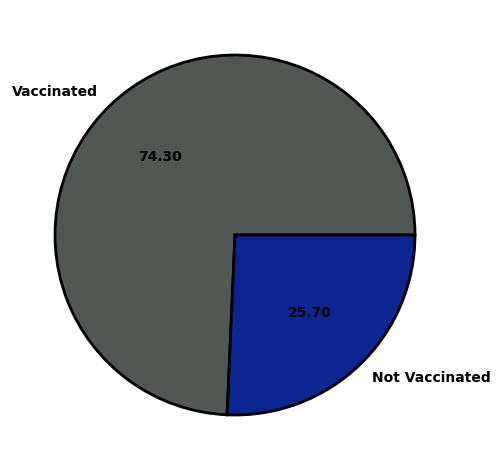

In [20]:
#Percentage of vaccinated population

pop = 59641488

##number of vaccinated individuals with AZ,COM and MOD
filt = (italy["Region"] == "Nazionale") & (italy["TargetGroup"] != "ALL")  & (italy.Vaccine != "JANSS") 
perc =  italy.loc[filt].groupby("YearWeekISO",as_index=False).sum()
vacc1 = perc.SecondDose.sum() #42085172

#number of vaccinated individuals with JANSS
filt = (italy["Region"] == "Nazionale") & (italy["TargetGroup"] != "ALL") & (italy.Vaccine == "JANSS")  
perc = italy.loc[filt].groupby("YearWeekISO",as_index=False).sum()
vacc2 = perc.FirstDose.sum() #1474832

#pie chart
plt.style.use("default")

vaccinated = vacc1+vacc2
not_vaccinated = pop-vaccinated

labels = ["Vaccinated", "Not Vaccinated"]
wedgeprops={"edgecolor":"k",'linewidth': 2, 'antialiased': True}
colors = ["#525753","#0c2691"]
plt.pie([vaccinated,not_vaccinated], labels=labels, autopct="%.2f", wedgeprops=wedgeprops, colors=colors,
        textprops={'fontsize': 10,"weight":"bold"})


plt.tight_layout()
plt.show()

In [21]:
#Percentage of vaccinated among target groups
filt = (italy["Region"] == "Nazionale") & (italy["TargetGroup"] != "ALL") 
perc_target = italy.loc[filt].groupby(["Denominator","TargetGroup","Vaccine"],as_index=False).sum()
perc_target

,Denominator,TargetGroup,Vaccine,FirstDose,SecondDose,DoseAdditional1,UnknownDose,Population,Total
0,4121339.0,Age18_24,AZ,103625,47126,1,0,3041715888,150752
1,4121339.0,Age18_24,COM,2839703,2650671,244324,0,3220640352,5734698
2,4121339.0,Age18_24,JANSS,99232,0,4,12,2504942496,99248
3,4121339.0,Age18_24,MOD,686174,606459,328066,71,3101357376,1620770
4,4419703.0,Age80+,AZ,77926,72449,35,0,3041715888,150410
5,4419703.0,Age80+,COM,3695638,3549950,2551891,0,3220640352,9797479
6,4419703.0,Age80+,JANSS,13777,0,17,25,2504942496,13819
7,4419703.0,Age80+,MOD,580210,535089,714577,487,3101357376,1830363
8,5968373.0,Age70_79,AZ,2215211,2109871,221,0,3041715888,4325303
9,5968373.0,Age70_79,COM,2744585,2625216,1794257,0,3220640352,7164058


In this case, to compute correctly the number of vaccinated people in each target group we sum the second dose for AZ, COM and MOD and later we add the single dose of JANSS by taking the row on index 2 of each group.

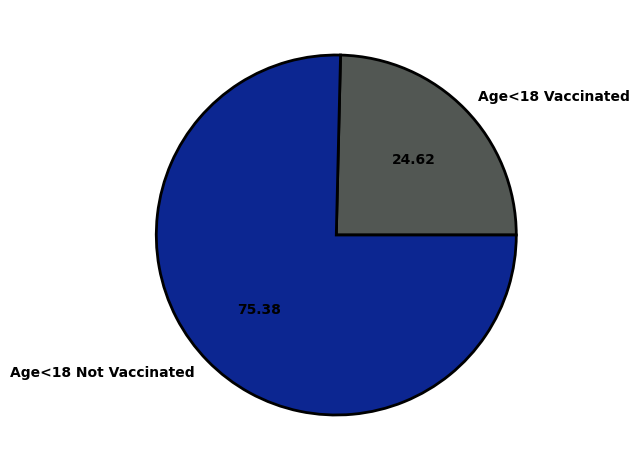

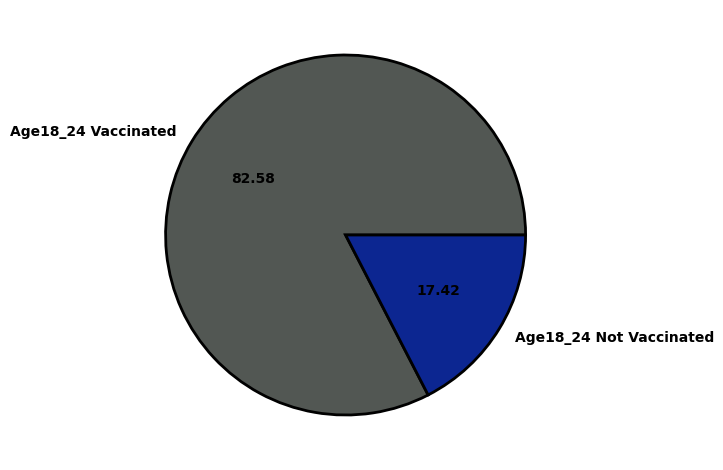

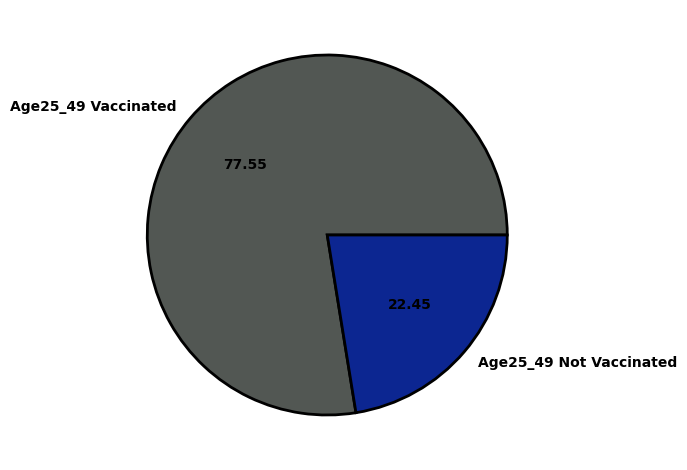

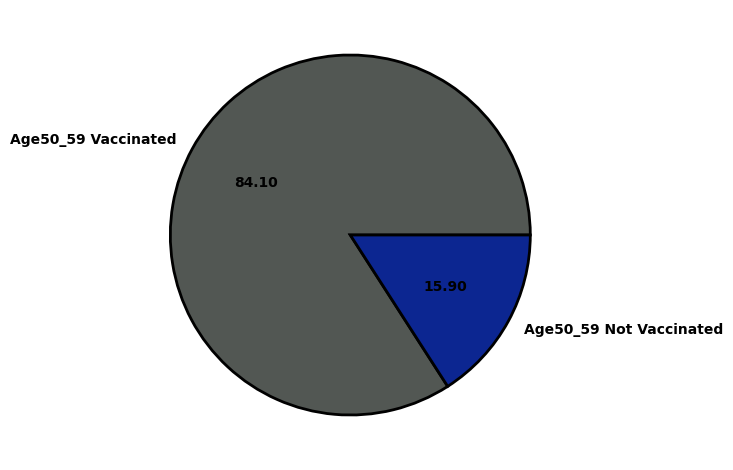

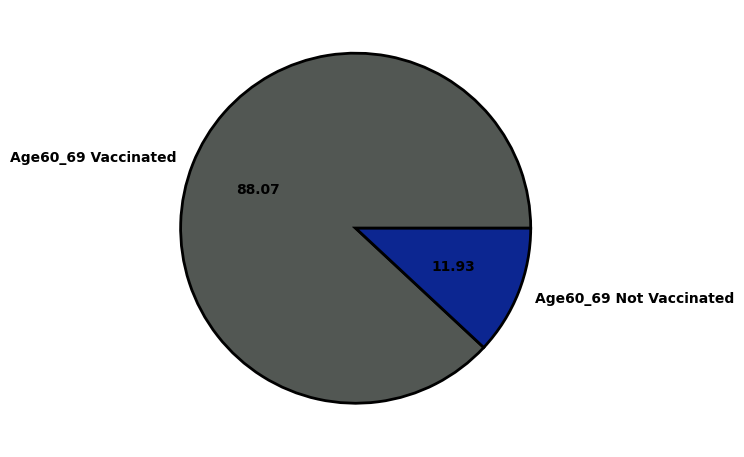

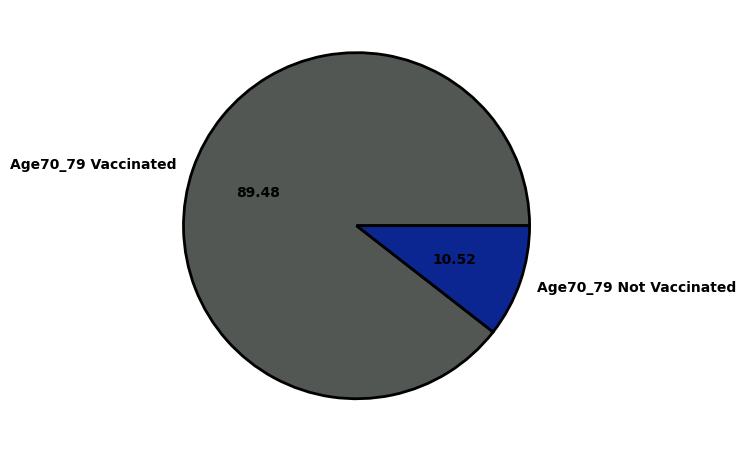

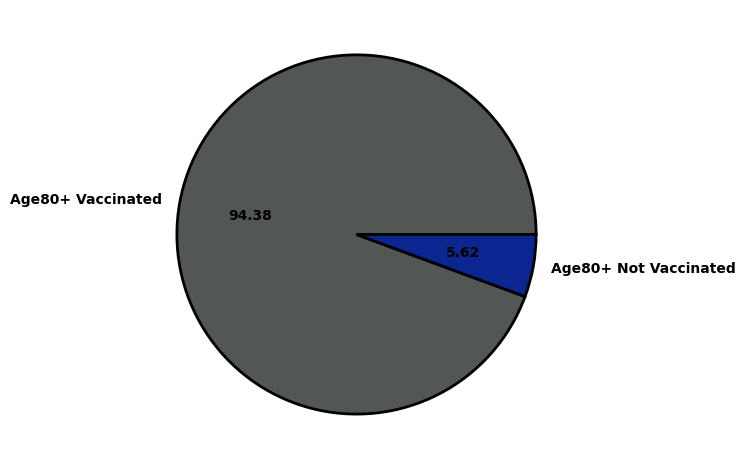

In [22]:
groups = ["Age<18","Age18_24","Age25_49","Age50_59","Age60_69","Age70_79","Age80+"]
plt.style.use("seaborn-pastel")

for group in groups:
    filt = perc_target["TargetGroup"] == group
    vacc = perc_target[filt]["SecondDose"].sum()+ perc_target[filt]["FirstDose"].reset_index(drop=True)[2]
    pop = perc_target[filt]["Denominator"].reset_index(drop=True)[0]
    not_vacc= pop - vacc
    
    
    labels = ["{} Vaccinated".format(group), "{} Not Vaccinated".format(group)]
    wedgeprops={"edgecolor":"k",'linewidth': 2, 'antialiased': True}
    colors = ["#525753","#0c2691"]
    plt.pie([vacc,not_vacc], labels=labels, autopct="%.2f", wedgeprops=wedgeprops, colors = colors, 
            textprops={'fontsize': 10,"weight":"bold"})
    


    plt.tight_layout()
    plt.show()

### Merge of the Data

To have a more complete overview of the pandemic, we merge the first dataset with another one we have found containing  informations about positive cases, intensive care, hospitalizations and swabs. 
This data set can be found on this link: 

https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv.

We have selected the most important parameters and translated their name from italian to english.

In [23]:
##We runned this chunk on 22/12/2021, it loads daily updated data but we worked with the file that stops that day
# url_data = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'

# data = pd.read_csv(url_data, usecols= ['data',"ricoverati_con_sintomi","terapia_intensiva","totale_ospedalizzati","nuovi_positivi",
#                   "dimessi_guariti","deceduti","tamponi"])

# eng_names = ["date","hosp_symptoms","intensive_care","hosp","positives","discharged","deceased","swabs"]
# data.columns = eng_names

# data
# data.to_csv("ds1.csv", sep=';', index = False)

,date,hosp_symptoms,intensive_care,hosp,positives,discharged,deceased,swabs
0,2020-02-24T18:00:00,101,26,127,221,1,7,4324
1,2020-02-25T18:00:00,114,35,150,93,1,10,8623
2,2020-02-26T18:00:00,128,36,164,78,3,12,9587
3,2020-02-27T18:00:00,248,56,304,250,45,17,12014
4,2020-02-28T18:00:00,345,64,409,238,46,21,15695
...,...,...,...,...,...,...,...,...
702,2022-01-26T17:00:00,20001,1665,21666,167206,7522210,144770,166244710
703,2022-01-27T17:00:00,19853,1645,21498,155697,7687989,145159,167284466
704,2022-01-28T17:00:00,19796,1630,21426,143898,7869583,145537,168335754
705,2022-01-29T17:00:00,19636,1588,21224,137147,8010813,145914,169335244


In [51]:
data = pd.read_csv("ds1.csv", sep=";")
data.head(10)

,date,hosp_symptoms,intensive_care,hosp,positives,discharged,deceased,swabs
0,2020-02-24T18:00:00,101,26,127,221,1,7,4324
1,2020-02-25T18:00:00,114,35,150,311,1,10,8623
2,2020-02-26T18:00:00,128,36,164,385,3,12,9587
3,2020-02-27T18:00:00,248,56,304,588,45,17,12014
4,2020-02-28T18:00:00,345,64,409,821,46,21,15695
5,2020-02-29T18:00:00,401,105,506,1049,50,29,18661
6,2020-03-01T18:00:00,639,140,779,1577,83,34,21127
7,2020-03-02T18:00:00,742,166,908,1835,149,52,23345
8,2020-03-03T18:00:00,1034,229,1263,2263,160,79,25856
9,2020-03-04T18:00:00,1346,295,1641,2706,276,107,29837


### Data Dictionary

+ **Date:** Day of investigation of the other variables.


+ **hosp_symptoms:** Number of people hospitalized with symptoms.


+ **intensive_care:** Number of people in intensive care.


+ **hosp:** Total Number of people hospedalized (sum of "hosp_symptoms" and "intensive_care")
 
 
+ **positives:** Number of positives.


+ **discharged:** Number of people discharged from the hospital.


+ **deceased:** Number of deceased people.


+ **swabs:** Number of swabs.

This dataset collects daily data: to merge them, at first we should transform the variable "date" into weeks and consequently aggregate all the other variables.

In [52]:
data["date"] = pd.to_datetime(data['date'])
data["week"] = data["date"].dt.week
data["year"] = data['date'].dt.to_period('Y')

l = []
for year,week in zip(data["year"],data["week"]):
    x = "{}-W{:02d}".format(year,week)
    l.append(x)
    
data["YearWeekISO"] = l

In [53]:
#change the order of the columns
column_order =["YearWeekISO","hosp_symptoms","intensive_care","hosp","positives","discharged","deceased","swabs"]
data = data.reindex(columns=column_order)

In [54]:
data.head(10)

,YearWeekISO,hosp_symptoms,intensive_care,hosp,positives,discharged,deceased,swabs
0,2020-W09,101,26,127,221,1,7,4324
1,2020-W09,114,35,150,311,1,10,8623
2,2020-W09,128,36,164,385,3,12,9587
3,2020-W09,248,56,304,588,45,17,12014
4,2020-W09,345,64,409,821,46,21,15695
5,2020-W09,401,105,506,1049,50,29,18661
6,2020-W09,639,140,779,1577,83,34,21127
7,2020-W10,742,166,908,1835,149,52,23345
8,2020-W10,1034,229,1263,2263,160,79,25856
9,2020-W10,1346,295,1641,2706,276,107,29837


After getting the weeks from the date we faced a problem: the last day of the 2020 was a Thursday and, as a consequence, the first 4 days of the week were correctly classified as 2020-W53, but the remaining 3 days of the same week were classified as 2021-W53 because the year changed. For this reason we have to make a little adjustment by replacing these 3 wrong days with the right classification: 2020-W53.

In [55]:
data["YearWeekISO"] = data["YearWeekISO"].replace(['2021-W53'],'2020-W53')

In [56]:
#check the type of the variables
data.dtypes

YearWeekISO       object
hosp_symptoms      int64
intensive_care     int64
hosp               int64
positives          int64
discharged         int64
deceased           int64
swabs              int64
dtype: object

In [57]:
#check if there are some null values
data.isna().sum()

YearWeekISO       0
hosp_symptoms     0
intensive_care    0
hosp              0
positives         0
discharged        0
deceased          0
swabs             0
dtype: int64

#### Weekly data aggregation:

Note that, as mentioned above, we have year to date cumulated so to have weekly data we have to consider the row with
maximum value for all columns.

In [58]:
data = data.groupby("YearWeekISO",as_index=False).max()

In [59]:
data.head(10)

,YearWeekISO,hosp_symptoms,intensive_care,hosp,positives,discharged,deceased,swabs
0,2020-W09,639,140,779,1577,83,34,21127
1,2020-W10,3557,650,4207,6387,622,366,49937
2,2020-W11,9663,1672,11335,20603,2335,1809,124899
3,2020-W12,19846,3009,22855,46638,7024,5476,258402
4,2020-W13,27386,3906,31292,73880,13030,10779,454030
5,2020-W14,29010,4068,33004,91246,21815,15887,691461
6,2020-W15,28976,3898,32874,102253,34211,19899,1010193
7,2020-W16,28023,3260,31283,108257,47055,23660,1356541
8,2020-W17,24906,2573,27479,108237,64928,26644,1757659
9,2020-W18,20353,1956,22309,105813,81654,28884,2153772


In this passage we select only the most significant columns of the first dataset to perform a merge with the second one.

In [60]:
data2 = italy.groupby("YearWeekISO",as_index=False)["FirstDose","SecondDose","DoseAdditional1","UnknownDose","Total"].sum()
data2.head(10)

,YearWeekISO,FirstDose,SecondDose,DoseAdditional1,UnknownDose,Total
0,2020-W52,21598,6,0,0,21604
1,2020-W53,351899,39,0,0,351938
2,2021-W01,1631910,102,0,3,1632015
3,2021-W02,1617484,9465,0,0,1626949
4,2021-W03,404479,326280,0,21,730780
5,2021-W04,95798,1587519,0,129,1683446
6,2021-W05,224764,1596951,0,63,1821778
7,2021-W06,880386,424394,0,6813,1311593
8,2021-W07,1414412,124013,0,0,1538425
9,2021-W08,2221194,195630,0,0,2416824


Before performing the merge we need to check if the values correspond between the two dataset.

In [61]:
data["YearWeekISO"].unique()

array(['2020-W09', '2020-W10', '2020-W11', '2020-W12', '2020-W13',
       '2020-W14', '2020-W15', '2020-W16', '2020-W17', '2020-W18',
       '2020-W19', '2020-W20', '2020-W21', '2020-W22', '2020-W23',
       '2020-W24', '2020-W25', '2020-W26', '2020-W27', '2020-W28',
       '2020-W29', '2020-W30', '2020-W31', '2020-W32', '2020-W33',
       '2020-W34', '2020-W35', '2020-W36', '2020-W37', '2020-W38',
       '2020-W39', '2020-W40', '2020-W41', '2020-W42', '2020-W43',
       '2020-W44', '2020-W45', '2020-W46', '2020-W47', '2020-W48',
       '2020-W49', '2020-W50', '2020-W51', '2020-W52', '2020-W53',
       '2021-W01', '2021-W02', '2021-W03', '2021-W04', '2021-W05',
       '2021-W06', '2021-W07', '2021-W08', '2021-W09', '2021-W10',
       '2021-W11', '2021-W12', '2021-W13', '2021-W14', '2021-W15',
       '2021-W16', '2021-W17', '2021-W18', '2021-W19', '2021-W20',
       '2021-W21', '2021-W22', '2021-W23', '2021-W24', '2021-W25',
       '2021-W26', '2021-W27', '2021-W28', '2021-W29', '2021-W

In [62]:
data2["YearWeekISO"].unique()

array(['2020-W52', '2020-W53', '2021-W01', '2021-W02', '2021-W03',
       '2021-W04', '2021-W05', '2021-W06', '2021-W07', '2021-W08',
       '2021-W09', '2021-W10', '2021-W11', '2021-W12', '2021-W13',
       '2021-W14', '2021-W15', '2021-W16', '2021-W17', '2021-W18',
       '2021-W19', '2021-W20', '2021-W21', '2021-W22', '2021-W23',
       '2021-W24', '2021-W25', '2021-W26', '2021-W27', '2021-W28',
       '2021-W29', '2021-W30', '2021-W31', '2021-W32', '2021-W33',
       '2021-W34', '2021-W35', '2021-W36', '2021-W37', '2021-W38',
       '2021-W39', '2021-W40', '2021-W41', '2021-W42', '2021-W43',
       '2021-W44', '2021-W45', '2021-W46', '2021-W47', '2021-W48',
       '2021-W49', '2021-W50', '2021-W51', '2021-W52'], dtype=object)

In [63]:
merged = pd.merge(data,data2,on="YearWeekISO",how="left")

In [64]:
merged["YearWeekISO"].unique()

array(['2020-W09', '2020-W10', '2020-W11', '2020-W12', '2020-W13',
       '2020-W14', '2020-W15', '2020-W16', '2020-W17', '2020-W18',
       '2020-W19', '2020-W20', '2020-W21', '2020-W22', '2020-W23',
       '2020-W24', '2020-W25', '2020-W26', '2020-W27', '2020-W28',
       '2020-W29', '2020-W30', '2020-W31', '2020-W32', '2020-W33',
       '2020-W34', '2020-W35', '2020-W36', '2020-W37', '2020-W38',
       '2020-W39', '2020-W40', '2020-W41', '2020-W42', '2020-W43',
       '2020-W44', '2020-W45', '2020-W46', '2020-W47', '2020-W48',
       '2020-W49', '2020-W50', '2020-W51', '2020-W52', '2020-W53',
       '2021-W01', '2021-W02', '2021-W03', '2021-W04', '2021-W05',
       '2021-W06', '2021-W07', '2021-W08', '2021-W09', '2021-W10',
       '2021-W11', '2021-W12', '2021-W13', '2021-W14', '2021-W15',
       '2021-W16', '2021-W17', '2021-W18', '2021-W19', '2021-W20',
       '2021-W21', '2021-W22', '2021-W23', '2021-W24', '2021-W25',
       '2021-W26', '2021-W27', '2021-W28', '2021-W29', '2021-W

In [65]:
merged.head()

,YearWeekISO,hosp_symptoms,intensive_care,hosp,positives,discharged,deceased,swabs,FirstDose,SecondDose,DoseAdditional1,UnknownDose,Total
0,2020-W09,639,140,779,1577,83,34,21127,NaN,NaN,NaN,NaN,NaN
1,2020-W10,3557,650,4207,6387,622,366,49937,NaN,NaN,NaN,NaN,NaN
2,2020-W11,9663,1672,11335,20603,2335,1809,124899,NaN,NaN,NaN,NaN,NaN
3,2020-W12,19846,3009,22855,46638,7024,5476,258402,NaN,NaN,NaN,NaN,NaN
4,2020-W13,27386,3906,31292,73880,13030,10779,454030,NaN,NaN,NaN,NaN,NaN


We have decided to merge the two data sets with the argument how="left": looking at the weeks, in the merged dataset we start from 2020-W09 to 2021-W51. This way we have excluded the week 2021-W52, because it's missing in one data set, but on the other hand we start from 2020-W09 even if we don't have any data in the vaccinations data set (obviously because the vaccinal campaign wasn't ongoing yet). Since we want to know if the beginning of the vaccinations has led to some improvement in terms of positive cases, intensive care and hospedalized, starting from 2020-W9 is not a problem.

The data regarding positive cases, deceased, hospedalized ecc. are cumulative. They can give us some informations but we think that greater differences can be highlighted if the data are taken daily (weekly in our case). For this reason we have created variables that collect weekly data.

In [66]:
col = ["hosp_symptoms","intensive_care","hosp","positives","discharged","deceased","swabs"]

for name in col:
     merged["new_{}".format(name)] = merged[name].diff(+1)

In [67]:
#change the order of the columns
column_order =["YearWeekISO","hosp_symptoms","new_hosp_symptoms","intensive_care","new_intensive_care","hosp","new_hosp","positives","new_positives","discharged",
               "new_discharged","deceased","new_deceased","swabs","new_swabs","FirstDose","SecondDose","DoseAdditional1","UnknownDose","Total"]
merged = merged.reindex(columns=column_order)

In [68]:
merged

,YearWeekISO,hosp_symptoms,new_hosp_symptoms,intensive_care,new_intensive_care,hosp,new_hosp,positives,new_positives,discharged,new_discharged,deceased,new_deceased,swabs,new_swabs,FirstDose,SecondDose,DoseAdditional1,UnknownDose,Total
0,2020-W09,639,NaN,140,NaN,779,NaN,1577,NaN,83,NaN,34,NaN,21127,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-W10,3557,2918.0,650,510.0,4207,3428.0,6387,4810.0,622,539.0,366,332.0,49937,28810.0,NaN,NaN,NaN,NaN,NaN
2,2020-W11,9663,6106.0,1672,1022.0,11335,7128.0,20603,14216.0,2335,1713.0,1809,1443.0,124899,74962.0,NaN,NaN,NaN,NaN,NaN
3,2020-W12,19846,10183.0,3009,1337.0,22855,11520.0,46638,26035.0,7024,4689.0,5476,3667.0,258402,133503.0,NaN,NaN,NaN,NaN,NaN
4,2020-W13,27386,7540.0,3906,897.0,31292,8437.0,73880,27242.0,13030,6006.0,10779,5303.0,454030,195628.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2021-W47,4964,619.0,638,118.0,5602,737.0,186443,37683.0,4687701,43950.0,133674,497.0,118335763,3836023.0,2062426.0,393159.0,3460132.0,658.0,5916375.0
92,2021-W48,5597,633.0,736,98.0,6333,731.0,232000,45557.0,4742887,55186.0,134195,521.0,122335117,3999354.0,551602.0,357440.0,7973458.0,0.0,8882500.0
93,2021-W49,6697,1100.0,829,93.0,7526,1193.0,284877,52877.0,4805809,62922.0,134831,636.0,125992518,3657401.0,591792.0,355852.0,8757668.0,4.0,9705316.0
94,2021-W50,7726,1029.0,966,137.0,8692,1166.0,362275,77398.0,4891239,85430.0,135641,810.0,130368736,4376218.0,579662.0,397263.0,9736909.0,12.0,10713846.0


In [69]:
#percentage of null values
nrow = merged.shape[0]
merged.isna().sum()/nrow

YearWeekISO           0.000000
hosp_symptoms         0.000000
new_hosp_symptoms     0.010417
intensive_care        0.000000
new_intensive_care    0.010417
hosp                  0.000000
new_hosp              0.010417
positives             0.000000
new_positives         0.010417
discharged            0.000000
new_discharged        0.010417
deceased              0.000000
new_deceased          0.010417
swabs                 0.000000
new_swabs             0.010417
FirstDose             0.447917
SecondDose            0.447917
DoseAdditional1       0.447917
UnknownDose           0.447917
Total                 0.447917
dtype: float64

All the null values are due to the fact that the vaccinal campaign started in 2021, so we are going to replace the NaNs with 0.

In [70]:
merged = merged.fillna(0)

In [71]:
nrow = merged.shape[0]
merged.isna().sum()/nrow

YearWeekISO           0.0
hosp_symptoms         0.0
new_hosp_symptoms     0.0
intensive_care        0.0
new_intensive_care    0.0
hosp                  0.0
new_hosp              0.0
positives             0.0
new_positives         0.0
discharged            0.0
new_discharged        0.0
deceased              0.0
new_deceased          0.0
swabs                 0.0
new_swabs             0.0
FirstDose             0.0
SecondDose            0.0
DoseAdditional1       0.0
UnknownDose           0.0
Total                 0.0
dtype: float64

### Data exploration: Analysis on the Effect of the Vaccinal Campaign

The idea is to find if the starting of the vaccinal campaign has influenced in a better way the COVID-19 trend. In particular we expect to see lower positive cases, hospedalizations and deceased. As a first step we create a new variable "Vax_Camp" which is a categorical variable that can take only "Yes" if the vaccinal campaign has already begun or "No" if it has not.

In [72]:
condition = merged.Total == 0
merged["Vax_Camp"] = np.where(condition,"No","Yes")
        

In [73]:
merged["Vax_Camp"].value_counts()

Yes    53
No     43
Name: Vax_Camp, dtype: int64

### Questions to Answer

+ Show the positive cases trend over time through a plot
+ Week in which the number of positive is the greatest?
+ Week in which the number of positive is the greatest?
+ Exploratory plots on Vax_Camp variable.
+ Correlation between variables?

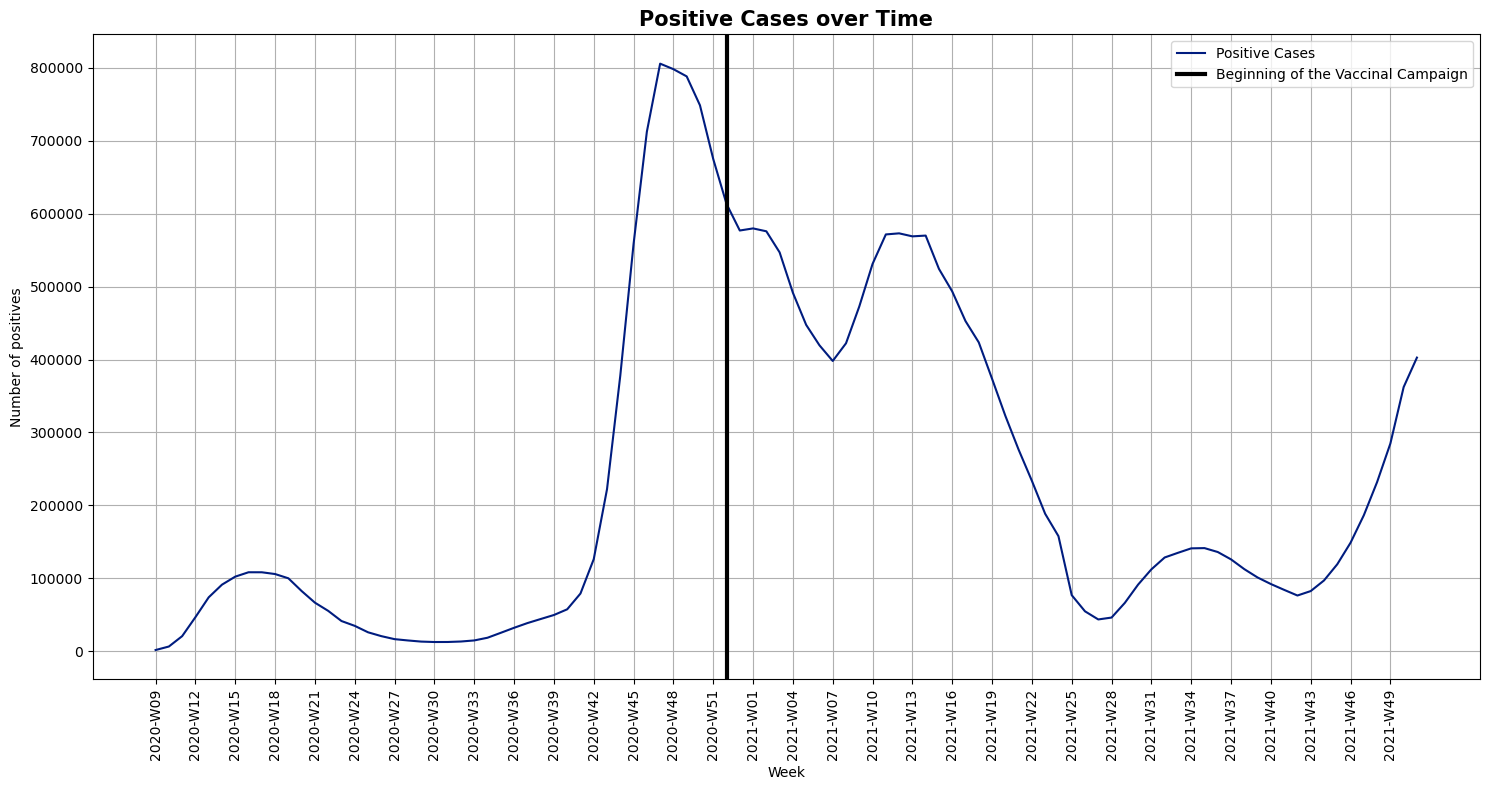

In [74]:
#Show the positive cases trend over time through a plot
plt.style.use("seaborn-dark-palette")

plt.figure(figsize=(15, 8))
plt.plot(merged.YearWeekISO,merged.positives, label="Positive Cases")

plt.xlabel("Week")
plt.ylabel("Number of positives")
plt.title("Positive Cases over Time",fontdict={"fontweight":"bold","fontsize":15})

plt.axvline("2020-W52", label='Beginning of the Vaccinal Campaign',color="black", linewidth=3)
#plt.axvline("2021-W47", label='Omicron Variant',color="red", linewidth=3)
plt.legend()

plt.xticks(merged.YearWeekISO[::3],rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

We can observe how the beginning of the vaccinal campaign (represented by the black vertical line) has influenced the positive cases trend: the curve was already decreasing even before the starting of the vaccinations, but surely the campaign has helped a lot to further reduce Covid-19 cases.


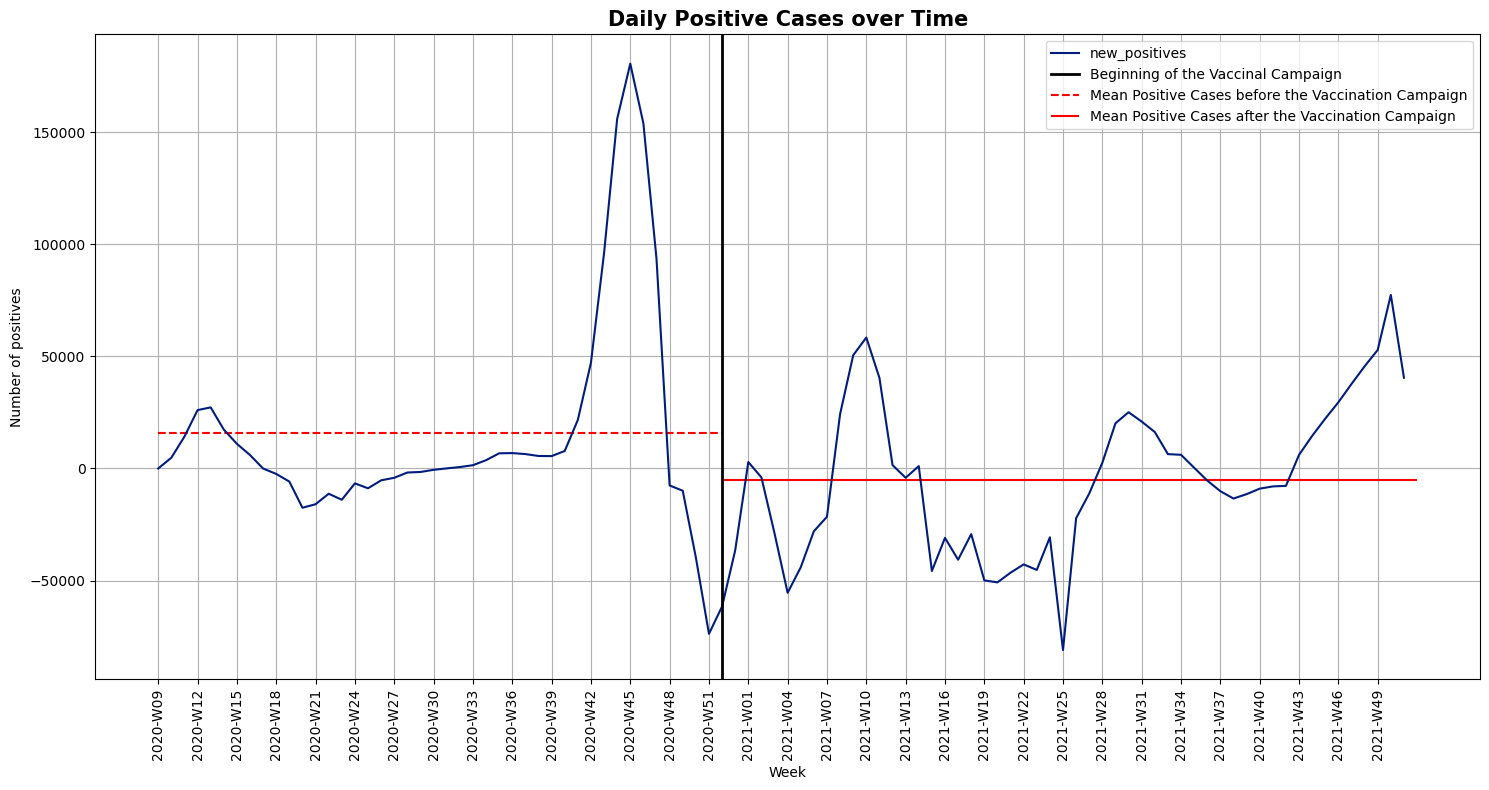

In [75]:
#Show the positive cases trend over time through a plot
plt.style.use("seaborn-dark-palette")


merged[["YearWeekISO","new_positives"]].plot(kind="line",figsize=(15,8), label="Daily Positive Cases")

meanNo = merged.loc[merged["Vax_Camp"]=="No"]["new_positives"].mean()
meanYes = merged.loc[merged["Vax_Camp"]=="Yes"]["new_positives"].mean()

plt.axvline(43, label='Beginning of the Vaccinal Campaign',color="black", linewidth=2)
plt.hlines(meanNo, 0, 43, label='Mean Positive Cases before the Vaccination Campaign', color="red", linestyles="--")
plt.hlines(meanYes, 43, 96, label='Mean Positive Cases after the Vaccination Campaign',color="red")
plt.legend()

plt.xlabel("Week")
plt.ylabel("Number of positives")
plt.title("Daily Positive Cases over Time",fontdict={"fontweight":"bold","fontsize":15})

plt.xticks((np.arange(96)[::3]), (merged.YearWeekISO[::3]), rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

In this plot, the black line denotes the beginning of the vaccinal campaign. We have drawn one dashed red line which is the mean of the daily positive cases before the vaccinations and a red line that is the same mean but after the vaccinations. We can observe the difference between these two values. An interesting thing is that the 0 is contained in this "difference interval", so the vaccinal campaign has led to a negative mean of daily positive cases.
In fact the mean of positive cases after the beginning of the vaccinal campaign drops below zero meaning that the number of healed cases is greater than the number of positive cases. 

The mean on such a long period could be a biased value. Another option is to calculate the mean over smaller periods, for instance every four weeks and then plotting the results.

In [76]:
#define a function that take a series as an input and return a new series with the mean
#for every 4 elements of the input series

def mean_4(series):
    l = []
    for i in range(0,len(series),4):
        if len(series[i:]) < 4:
            l.append(np.mean(series[i:]))
            break
        x=(series[i]+series[i+1]+series[i+2]+series[i+3])/4
        l.append(x)
        
    return l

We have to apply the function above only to the columns containing weekly data and not the columns containing cumulated data.

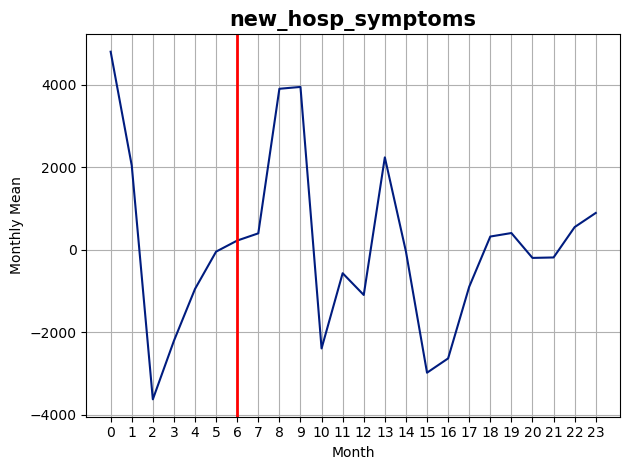

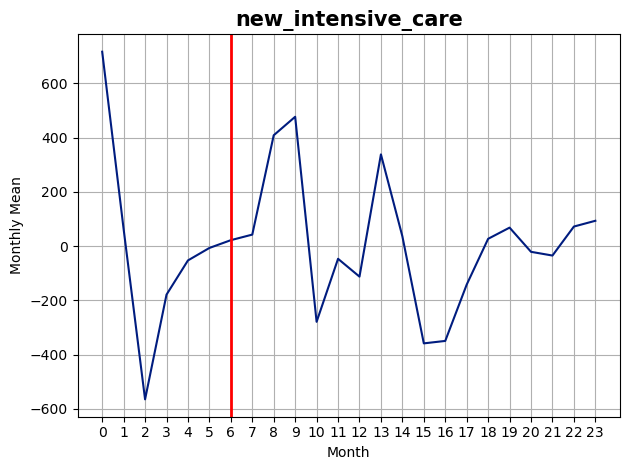

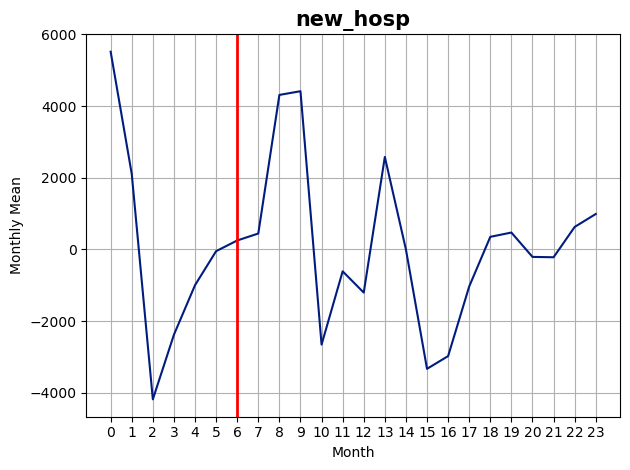

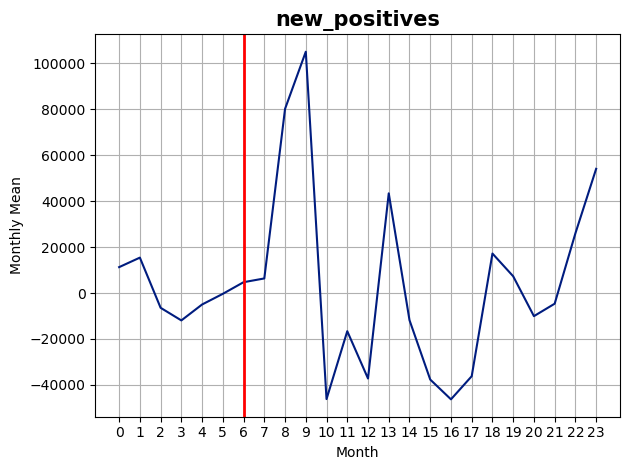

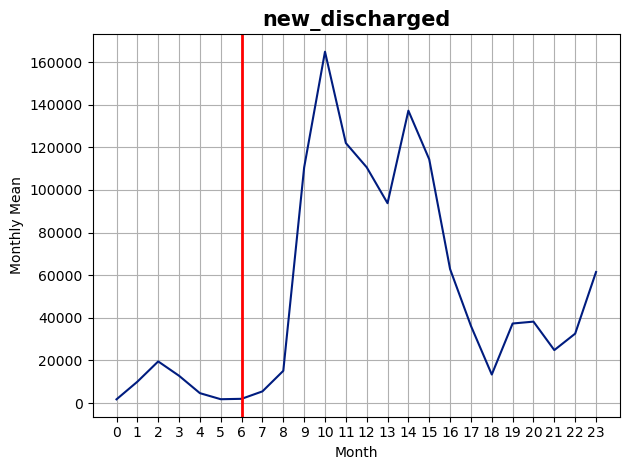

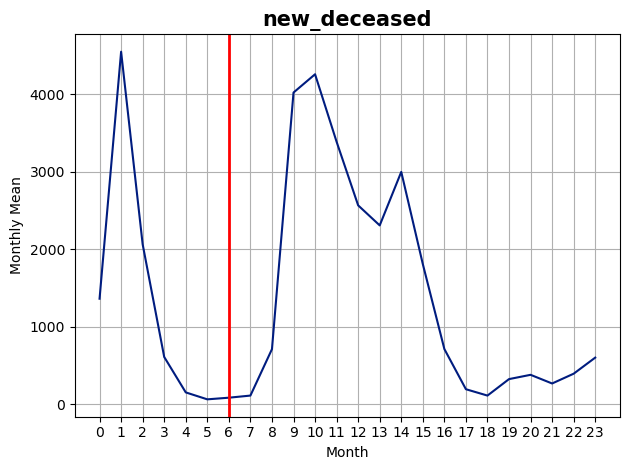

In [77]:
l=["new_hosp_symptoms","new_intensive_care","new_hosp","new_positives","new_discharged","new_deceased"]

for name in merged.columns:
    if name in l:
        
        monthly_mean = mean_4(merged[name])
        plt.plot(monthly_mean)
        
        plt.axvline(6, linewidth=2, color="r")
        plt.xticks(np.arange(24))
        
        plt.xlabel("Month")
        plt.ylabel("Monthly Mean")
        plt.title(name,fontdict={"fontweight":"bold","fontsize":15})
        
        plt.grid()
        plt.tight_layout()
        plt.show()

Watching at these plots, we can observe that the beginning of the vaccinal campaign (vertical red line) does not lead to instant results but the positive effects can be seen in a window of 8 and 16 weeks from the start of the campaign.

In [78]:
#Week in which the number of positive is the greatest.
merged.sort_values(by="new_positives",ascending=False)[["YearWeekISO","new_positives"]].head() #2020-W45

,YearWeekISO,new_positives
36,2020-W45,180507.0
35,2020-W44,155888.0
37,2020-W46,153854.0
34,2020-W43,96004.0
38,2020-W47,93457.0


In [79]:
#Week in which the number of positive is the lowest.
merged.sort_values(by="new_positives")[["YearWeekISO","new_positives"]].head() #2021-W25

,YearWeekISO,new_positives
69,2021-W25,-80937.0
42,2020-W51,-73710.0
43,2020-W52,-61527.0
48,2021-W04,-55429.0
64,2021-W20,-50779.0


As in the case above we consider only the columns containing weekly data.

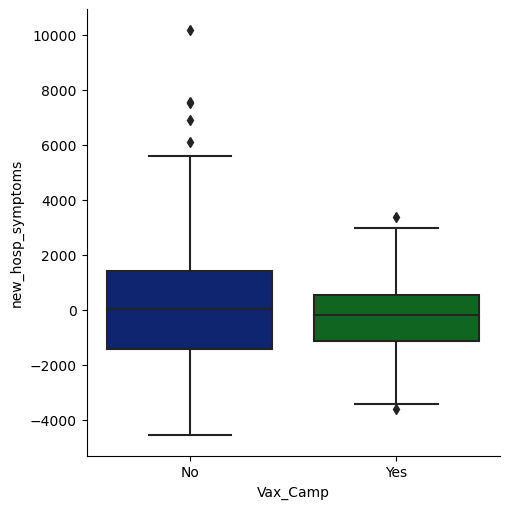

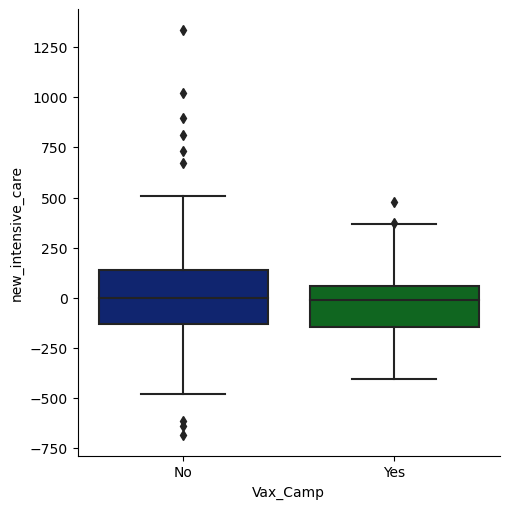

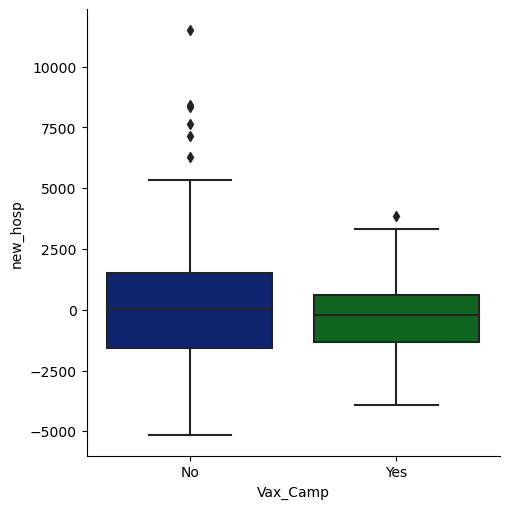

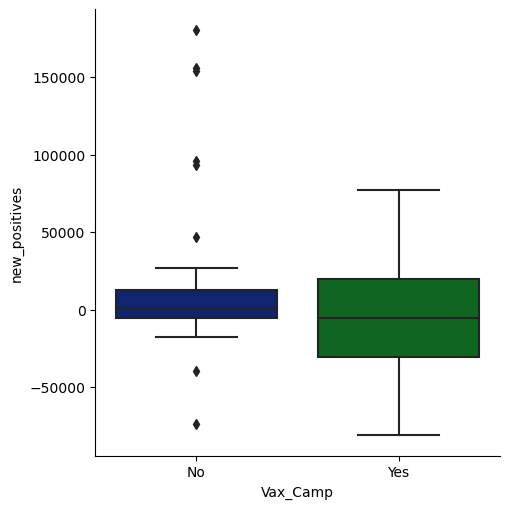

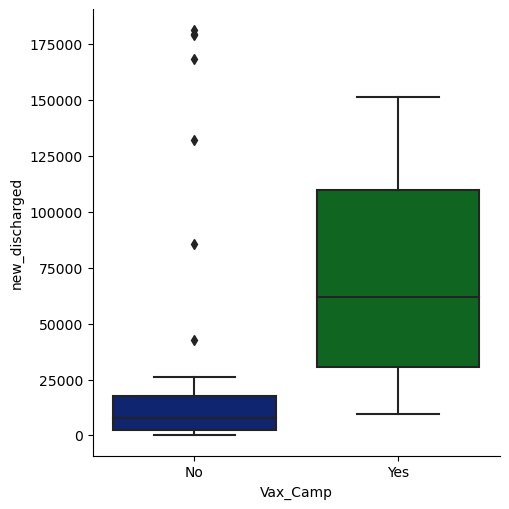

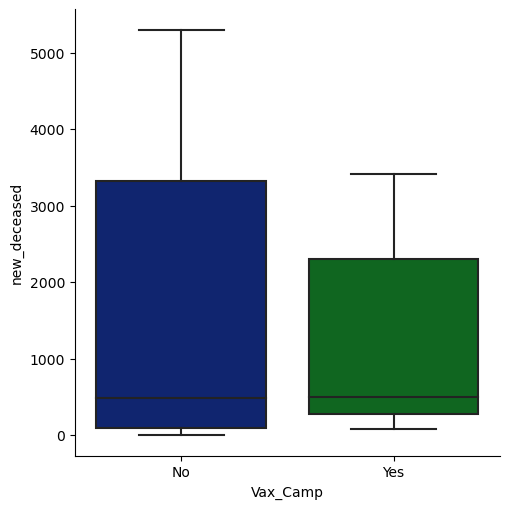

In [80]:
#Exploratory plots on Vax_Camp variable.
l=["new_hosp_symptoms","new_intensive_care","new_hosp","new_positives","new_discharged","new_deceased"]

for name in merged.columns:
    if name in l:

        sns.catplot("Vax_Camp",name, data=merged, kind="box")


        plt.show()

The purpose of these graphs was to investigate if there was a significant difference in the data between the period before and after the beginning of the vaccinal campaign.
Excluding the variable discharged, apparentely there is no significant difference in the distribution of the medians. 
Another important aspect is the fact that, in the data before the beginning of the vaccinal campaign, there are a lot of outliers on the positive side.

The next step consists of checking if a correlation between the numerical variables exists. For this task we can use a correlation matrix, but before doing that we have to exclude the categorical variables. In addition, we keep only the variables that collect weekly cases (not cumulative).

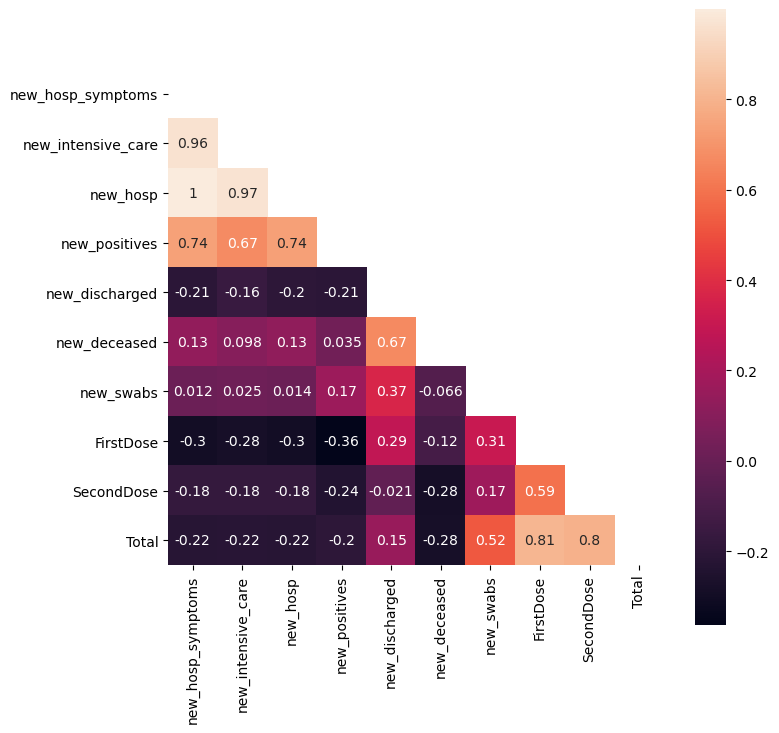

In [81]:
#Correlation between variables?
exclude = ["hosp_symptoms","intensive_care","hosp","positives","discharged","deceased","swabs","DoseAdditional1","UnknownDose"]
corr = merged.loc[:, ~merged.columns.isin(exclude)].corr()

plt.figure(figsize=(8,8))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(merged.loc[:, ~merged.columns.isin(exclude)].corr(), square=True, annot=True, mask=mask)

plt.show()

This is a correlation matrix in heatmap form. It's used to see if some variables are positively correlated, negatively correlated or if there isn't a correlation between two features. If we check the correlation for the variable "FirstDose", we observe that it is somewhat negatively correlated with "new_hosp", "new_positives" and "new_deceased", but it's positively correlated with "new_discharged".
This aspect support the hypothesis of the positive effect of the vaccinal campaign on the covid-19 trend.